In [ ]:
query = """
SELECT *
FROM `stockprediction-434721.stock_data.google_prices`
WHERE CAST(Date AS DATE) >= DATE_SUB(CURRENT_DATE(), INTERVAL 5 YEAR)
"""

google_df = client.query(query).to_dataframe()

In [ ]:
googl_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2023-03-02 00:00:00+00:00,89.660004,92.279999,89.589996,92.0000,91.894531,32204400,GOOGL
1,2020-11-05 00:00:00+00:00,88.522499,89.591003,87.051498,88.1250,88.023979,39758000,GOOGL
2,2023-11-20 00:00:00+00:00,133.690002,136.660004,133.619995,136.2500,136.093811,27815500,GOOGL
3,2023-10-23 00:00:00+00:00,135.039993,137.660004,133.949997,136.5000,136.343521,26317900,GOOGL
4,2024-04-05 00:00:00+00:00,150.029999,153.419998,149.600006,152.5000,152.325180,23449300,GOOGL
5,2021-03-08 00:00:00+00:00,104.203003,105.686996,100.259499,100.3750,100.259933,36868000,GOOGL
6,2021-02-11 00:00:00+00:00,104.550003,104.699997,103.443001,104.4375,104.317772,20480000,GOOGL
7,2023-04-18 00:00:00+00:00,106.489998,106.540001,104.070000,104.5000,104.380203,26596400,GOOGL
8,2023-10-19 00:00:00+00:00,138.500000,139.660004,137.380005,137.7500,137.592087,26066000,GOOGL
9,2022-09-14 00:00:00+00:00,104.570000,105.279999,103.660004,105.0000,104.879631,26395100,GOOGL


**CLEANING AND PREPROCESSING:**

In [ ]:
# Check for any missing or null values
print(google_df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64


In [ ]:
import pandas as pd
# Ensure that Date is in datetime format
google_df['Date'] = pd.to_datetime(google_df['Date'])

In [ ]:
# Drop columns that are not necessary for modeling
# Adjust this based on your needs
google_df = google_df.drop(columns=['Adj Close'])

In [ ]:
# Sort data by Date in ascending order
google_df = google_df.sort_values(by='Date', ascending=True)

In [ ]:
# Preview updated dataframes
print(google_df.head())

                          Date       Open       High        Low      Close  \
847  2019-09-16 00:00:00+00:00  61.521999  61.951000  61.259499  61.581501   
503  2019-09-17 00:00:00+00:00  61.581501  61.750000  61.167500  61.493999   
1101 2019-09-18 00:00:00+00:00  61.512001  61.812000  60.823502  61.632500   
30   2019-09-19 00:00:00+00:00  61.616001  62.216999  61.615501  61.937500   
1247 2019-09-20 00:00:00+00:00  61.681999  62.139999  61.179001  61.492001   

        Volume Ticker  
847   28218000  GOOGL  
503   20806000  GOOGL  
1101  17440000  GOOGL  
30    16554000  GOOGL  
1247  37692000  GOOGL  


**FEATURE ENGINEERING:**

1. Create Rolling Features:
Moving Averages (e.g., 7-day, 30-day): These smooth out stock prices and reveal trends.
Volatility (Standard deviation of returns): Indicates stock price variability.
2. Create Lag Features:
Previous day's prices: Prices from a few days ago can help the model see short-term trends.
3. Compute Returns:
Daily returns: Percentage change from one day to the next.


In [ ]:
# Feature Engineering for google

# 1. Moving Averages
google_df['7_day_MA'] = google_df['Close'].rolling(window=7).mean()
google_df['30_day_MA'] = google_df['Close'].rolling(window=30).mean()

# 2. Volatility (Standard deviation of daily returns over 7 and 30 days)
google_df['7_day_volatility'] = google_df['Close'].pct_change().rolling(window=7).std()
google_df['30_day_volatility'] = google_df['Close'].pct_change().rolling(window=30).std()

# 3. Lag Features (Previous day's price and volume)
google_df['Previous_Close'] = google_df['Close'].shift(1)
google_df['Previous_Volume'] = google_df['Volume'].shift(1)

# 4. Daily Returns
google_df['Daily_Return'] = google_df['Close'].pct_change()

# Preview updated dataframe for google
print(google_df.head())

                          Date       Open       High        Low      Close  \
847  2019-09-16 00:00:00+00:00  61.521999  61.951000  61.259499  61.581501   
503  2019-09-17 00:00:00+00:00  61.581501  61.750000  61.167500  61.493999   
1101 2019-09-18 00:00:00+00:00  61.512001  61.812000  60.823502  61.632500   
30   2019-09-19 00:00:00+00:00  61.616001  62.216999  61.615501  61.937500   
1247 2019-09-20 00:00:00+00:00  61.681999  62.139999  61.179001  61.492001   

        Volume Ticker  7_day_MA  30_day_MA  7_day_volatility  \
847   28218000  GOOGL       NaN        NaN               NaN   
503   20806000  GOOGL       NaN        NaN               NaN   
1101  17440000  GOOGL       NaN        NaN               NaN   
30    16554000  GOOGL       NaN        NaN               NaN   
1247  37692000  GOOGL       NaN        NaN               NaN   

      30_day_volatility  Previous_Close  Previous_Volume  Daily_Return  
847                 NaN             NaN             <NA>           NaN  


Date                  0
Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Ticker                0
7_day_MA              6
30_day_MA            29
7_day_volatility      7
30_day_volatility    30
Previous_Close        1
Previous_Volume       1
Daily_Return          1
dtype: int64


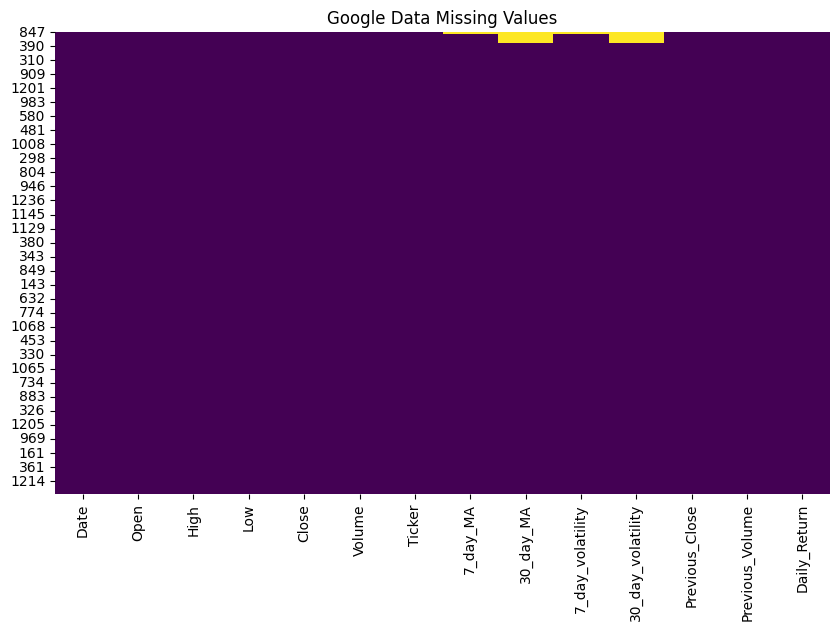

In [ ]:
# Check for missing values in each column for google
print(google_df.isna().sum())

# Visualize where NaNs occur in google data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(google_df.isna(), cbar=False, cmap="viridis")
plt.title('google Data Missing Values')
plt.show()

Based on the heatmaps and summary, it looks like the missing values are indeed concentrated at the beginning of each dataset, particularly in the moving averages and volatility columns. Since these are rolling calculations, it's normal to see NaN values at the start.

It would be appropriate to drop the rows that contain these NaN values since they appear at the beginning and are not informative for future predictions.

In [ ]:
# Drop rows with NaN values in the google dataframe
google_df_cleaned = google_df.dropna()

# Preview the cleaned google dataframe
print(google_df_cleaned.head())

                          Date       Open       High        Low      Close  \
587  2019-10-28 00:00:00+00:00  63.750000  64.961998  63.615501  64.448997   
494  2019-10-29 00:00:00+00:00  63.799999  64.040001  62.780499  63.033001   
1187 2019-10-30 00:00:00+00:00  62.757500  63.401001  62.532501  63.035000   
1153 2019-10-31 00:00:00+00:00  63.000000  63.326000  62.473999  62.939999   
525  2019-11-01 00:00:00+00:00  63.290001  63.650002  62.985500  63.612499   

        Volume Ticker   7_day_MA  30_day_MA  7_day_volatility  \
587   65428000  GOOGL  62.856500  61.475750          0.009195   
494   52654000  GOOGL  62.972572  61.527050          0.013149   
1187  29204000  GOOGL  63.089857  61.573800          0.013146   
1153  31904000  GOOGL  63.215571  61.607217          0.013097   
525   28812000  GOOGL  63.320000  61.677900          0.012766   

      30_day_volatility  Previous_Close  Previous_Volume  Daily_Return  
587            0.011020       63.215000         27104000      0.019

In [ ]:
print(google_df_cleaned.shape)

(1221, 14)


Exporting to CSV to update BigQuery table:

In [ ]:
# Define the filename for the google dataframe
google_csv_filename = "google_cleaned_feature_engineered.csv"

# Export the cleaned google dataframe to CSV
google_df_cleaned.to_csv(google_csv_filename, index=False)

print(f"Dataframe exported to CSV: {google_csv_filename}")

Dataframe exported to CSV: googl_cleaned_feature_engineered.csv


In [ ]:
from google.colab import files

# Download the google CSV file to your local machine
files.download('google_cleaned_feature_engineered.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**MODEL TRAINING:**

Step 1: Split the Data into Training and Testing Sets

* Training Set: 80% of the data, used to train the model.
* Testing Set: 20% of the data, used to evaluate the model's accuracy.

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X_google = google_df_cleaned[['7_day_MA', '30_day_MA', '7_day_volatility', '30_day_volatility', 'Previous_Close', 'Previous_Volume', 'Daily_Return']]
y_google = google_df_cleaned['Close']

# Split the data
X_train_google, X_test_google, y_train_google, y_test_google = train_test_split(X_google, y_google, test_size=0.2, random_state=42)

# Preview the shapes
print(X_train_google.shape, X_test_google.shape, y_train_google.shape, y_test_google.shape)

(976, 7) (245, 7) (976,) (245,)


Step 2: Select Machine Learning Models

* Start with Linear Regression for simplicity and benchmarking.
* Move to Random Forest or XGBoost to capture more complex patterns.
* Optionally, explore ARIMA or LSTM if you want a time-series-specific model.

**LINEAR REGRESSION MODEL:**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model_google = LinearRegression()

# Train the model on the training data
model_google.fit(X_train_google, y_train_google)

# Predict on the test data
y_pred_google = model_google.predict(X_test_google)

# Evaluate the model
mse_google = mean_squared_error(y_test_google, y_pred_google)
r2_google = r2_score(y_test_google, y_pred_google)

print("google Linear Regression Performance:")
print(f"Mean Squared Error: {mse_google}")
print(f"R-squared: {r2_google}")

Google Linear Regression Performance:
Mean Squared Error: 0.3042198531078174
R-squared: 0.9996599043157406


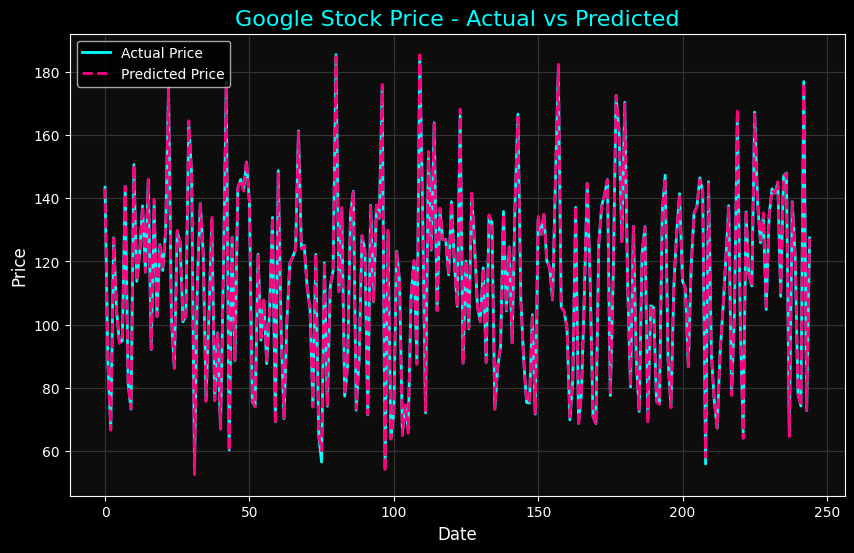

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the cyberpunk theme colors
cyberpunk_blue = '#00FFFF'
cyberpunk_red = '#FF007F'
cyberpunk_background = '#0D0D0D'

# Customize the plot style
plt.style.use('dark_background')

# Plot for google stock
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(y_test_google)), y_test_google, color=cyberpunk_blue, label='Actual Price', linewidth=2)
plt.plot(np.arange(len(y_pred_google)), y_pred_google, color=cyberpunk_red, linestyle='--', label='Predicted Price', linewidth=2)
plt.title('google Stock Price - Actual vs Predicted', fontsize=16, color=cyberpunk_blue)
plt.xlabel('Date', fontsize=12, color='white')
plt.ylabel('Price', fontsize=12, color='white')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, color='#333333')
plt.gca().set_facecolor(cyberpunk_background)
plt.show()

**RANDOM FOREST MODEL:**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
rf_google = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_google.fit(X_train_google, y_train_google)

# Predict on the test data
y_pred_rf_google = rf_google.predict(X_test_google)

# Evaluate the model
mse_rf_google = mean_squared_error(y_test_google, y_pred_rf_google)
r2_rf_google = r2_score(y_test_google, y_pred_rf_google)

print("google Random Forest Performance:")
print(f"Mean Squared Error: {mse_rf_google}")
print(f"R-squared: {r2_rf_google}")

Google Random Forest Performance:
Mean Squared Error: 0.8180990764843861
R-squared: 0.9990854246941263


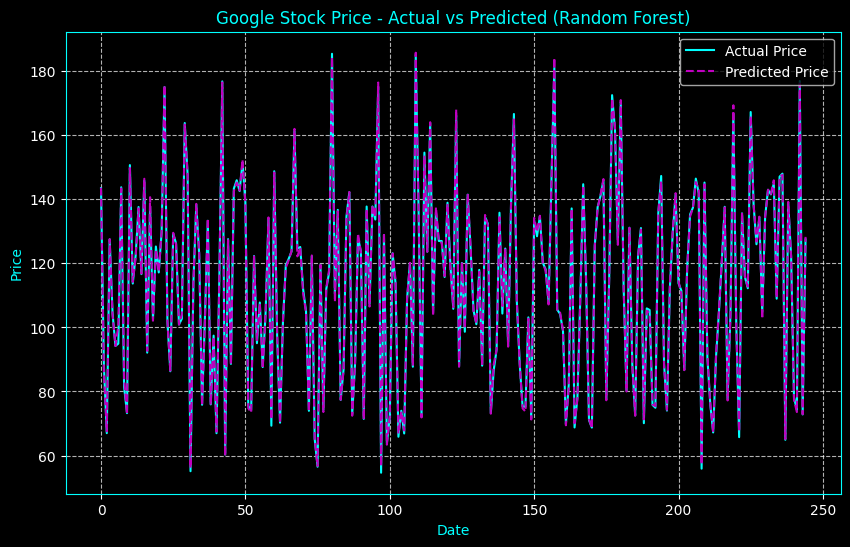

In [ ]:
# Visualization for Random Forest - google
plt.figure(figsize=(10, 6))
plt.plot(y_test_google[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_rf_google[:250], 'm--', label="Predicted Price")
plt.title("google Stock Price - Actual vs Predicted (Random Forest)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

FEATURE IMPORTANCE ANALYSIS:

explore which features (7-day MA, 30-day volatility, etc.) had the most influence on the stock price predictions.

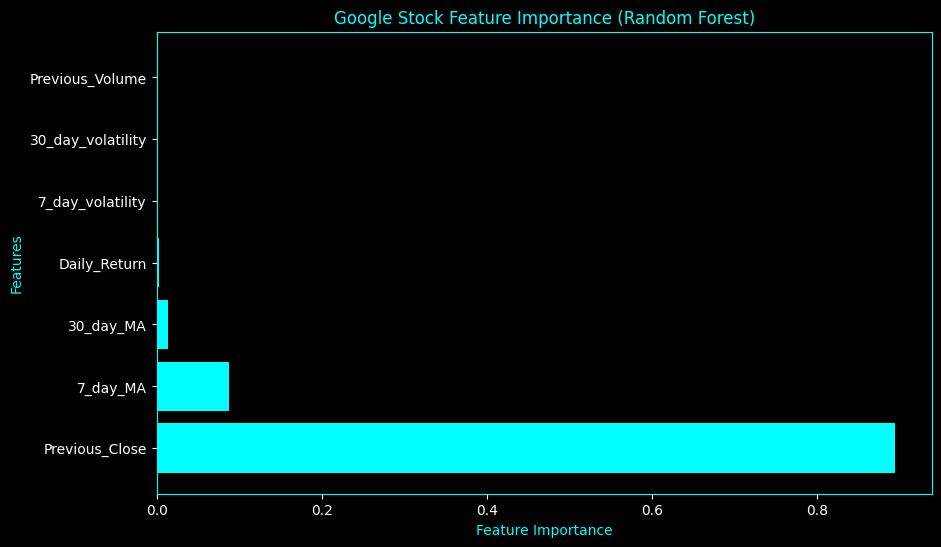

In [ ]:
# Get feature importance from the Random Forest model
importances_google = rf_google.feature_importances_

# Create a dataframe for the features and their importance
feature_names_google = X_train_google.columns
importance_df_google = pd.DataFrame({
    'Feature': feature_names_google,
    'Importance': importances_google
})

# Sort the dataframe by importance
importance_df_google = importance_df_google.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df_google['Feature'], importance_df_google['Importance'], color='cyan')
plt.xlabel('Feature Importance', color='cyan')
plt.ylabel('Features', color='cyan')
plt.title('google Stock Feature Importance (Random Forest)', color='cyan')
plt.gca().set_facecolor('black')
plt.gca().spines['bottom'].set_color('cyan')
plt.gca().spines['top'].set_color('cyan')
plt.gca().spines['left'].set_color('cyan')
plt.gca().spines['right'].set_color('cyan')
plt.show()

**GRADIENT BOOSTING REGRESSOR:**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting model
gb_google = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_google.fit(X_train_google, y_train_google)

# Predict on the test data
y_pred_gb_google = gb_google.predict(X_test_google)

# Evaluate the model
mse_gb_google = mean_squared_error(y_test_google, y_pred_gb_google)
r2_gb_google = r2_score(y_test_google, y_pred_gb_google)

print("google Gradient Boosting Performance:")
print(f"Mean Squared Error: {mse_gb_google}")
print(f"R-squared: {r2_gb_google}")

Google Gradient Boosting Performance:
Mean Squared Error: 0.807097784485413
R-squared: 0.9990977233389777


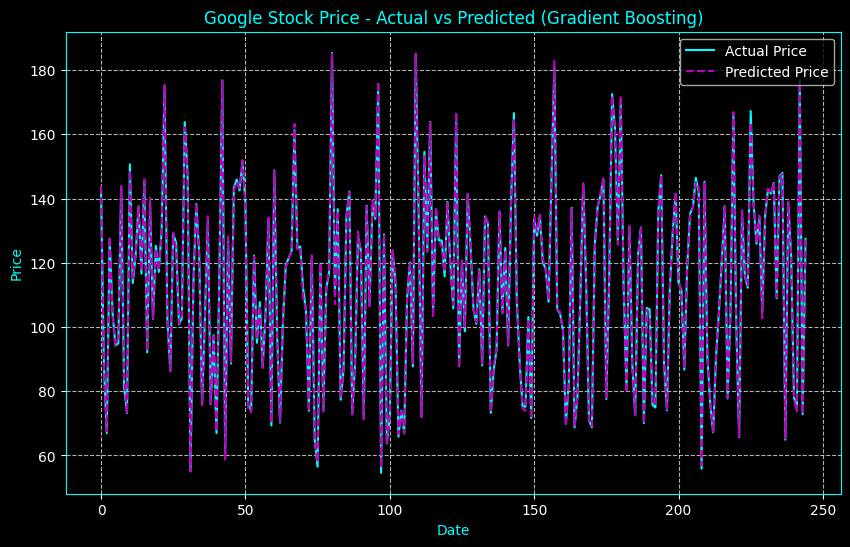

In [ ]:
# Visualization for Gradient Boosting - google
plt.figure(figsize=(10, 6))
plt.plot(y_test_google[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_gb_google[:250], 'm--', label="Predicted Price")
plt.title("google Stock Price - Actual vs Predicted (Gradient Boosting)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

HYPERPARAMETER TUNING:

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update
    'max_depth': [3, 5, 7],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Initialize the Gradient Boosting Regressor for google
gb_google = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV to find the best parameters
grid_search_google = GridSearchCV(estimator=gb_google, param_grid=param_grid,
                                 cv=5, n_jobs=-1, verbose=2)

# Fit the model to the google training data
grid_search_google.fit(X_train_google, y_train_google)

# Get the best parameters from GridSearch
best_params_google = grid_search_google.best_params_
print("Best parameters for google:", best_params_google)

# Evaluate the model with the best parameters
best_gb_google = grid_search_google.best_estimator_
y_pred_gb_google = best_gb_google.predict(X_test_google)
mse_google = mean_squared_error(y_test_google, y_pred_gb_google)
r2_google = r2_score(y_test_google, y_pred_gb_google)

print("google Gradient Boosting Performance (Tuned):")
print(f"Mean Squared Error: {mse_google}")
print(f"R-squared: {r2_google}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters for Google: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Google Gradient Boosting Performance (Tuned):
Mean Squared Error: 0.6612336977634583
R-squared: 0.9992607887861398


SAVING THE TUNED MODEL:

In [ ]:
import joblib
joblib.dump(best_gb_google, 'best_gb_google_model.pkl')

['best_gb_google_model.pkl']

(FOR FUTURE REFERENCE): LOAD MODEL

In [ ]:
#import joblib

# best_gb_google_loaded = joblib.load('best_gb_google_model.pkl')
# future_predictions = best_gb_google_loaded.predict(new_data)

**Long Short-Term Memory (LSTM) Neural Network for stock price prediction:**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Feature scaling
scaler = StandardScaler()
X_train_google_scaled = scaler.fit_transform(X_train_google)
X_test_google_scaled = scaler.transform(X_test_google)

# Define the neural network model
model_google = Sequential([
    Dense(64, input_dim=X_train_google.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer
])

# Compile the model
model_google.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history_google = model_google.fit(X_train_google_scaled, y_train_google,
                                  validation_split=0.2, epochs=50, batch_size=32)

# Predict on the test set
y_pred_nn_google = model_google.predict(X_test_google_scaled)

# Evaluate the performance
mse_google_nn = mean_squared_error(y_test_google, y_pred_nn_google)
r2_google_nn = r2_score(y_test_google, y_pred_nn_google)

print("google Neural Network Performance:")
print(f"Mean Squared Error: {mse_google_nn}")
print(f"R-squared: {r2_google_nn}")

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 13658.7598 - val_loss: 13657.1328
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13237.3096 - val_loss: 12971.4639
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12422.0498 - val_loss: 11615.1182
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10956.1113 - val_loss: 9381.0244
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8574.8867 - val_loss: 6527.8501
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5493.3687 - val_loss: 3887.6875
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3325.1492 - val_loss: 2325.8489
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2205.5608 - val_loss: 1810.8602
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1688.7007 - val_loss: 1616.7953
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1591.1871 - val_loss: 1453.3530
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1453.1786 - val_loss: 1299.7181
Epoch 12/50


Notes:
You can adjust the number of neurons, layers, epochs, and batch size to optimize the model.
The StandardScaler ensures that all features are on the same scale, which is important for neural networks.
The models are trained for 50 epochs, but you can adjust the number of epochs based on the performance.


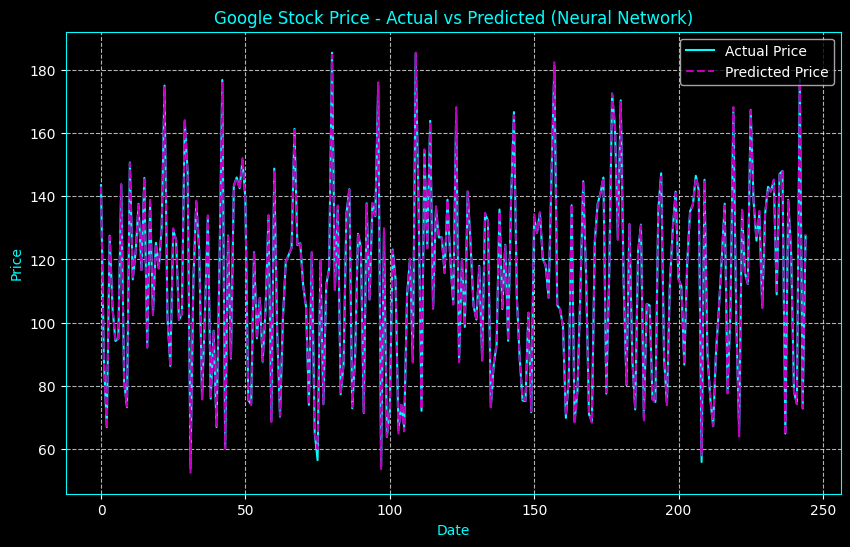

In [ ]:
# google Neural Network Predictions Visualization
plt.figure(figsize=(10, 6))
plt.plot(y_test_google[:250].values, color="cyan", label="Actual Price")
plt.plot(y_pred_google[:250], 'm--', label="Predicted Price")
plt.title("google Stock Price - Actual vs Predicted (Neural Network)", color="cyan")
plt.xlabel("Date", color="cyan")
plt.ylabel("Price", color="cyan")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.7)
plt.gca().set_facecolor("black")
plt.gca().spines["bottom"].set_color("cyan")
plt.gca().spines["top"].set_color("cyan")
plt.gca().spines["left"].set_color("cyan")
plt.gca().spines["right"].set_color("cyan")
plt.show()

In [ ]:
import joblib

# Save Linear Regression model
joblib.dump(model_google, 'linear_reg_google_model.pkl')

# Save Random Forest model (make sure the correct variable name is used when training the model)
joblib.dump(rf_google, 'random_forest_google_model.pkl')

# Save Neural Network model
model_google.save('best_nn_google_model_tuned.keras')

In [ ]:
import joblib
from tensorflow.keras.models import load_model

# Load Linear Regression model
linear_reg_google_model = joblib.load('linear_reg_google_model.pkl')

# Load Random Forest model
rf_google_model = joblib.load('random_forest_google_model.pkl')

# Load Gradient Boosting model
best_gb_google_model = joblib.load('best_gb_google_model.pkl')

# Load Neural Network model
best_nn_google_model = load_model('best_nn_google_model_tuned.keras')

In [ ]:
from google.colab import files

# Downloading google models
files.download('linear_reg_google_model.pkl')
files.download('random_forest_google_model.pkl')
files.download('best_gb_google_model.pkl')
files.download('best_nn_google_model_tuned.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Dashboard:**

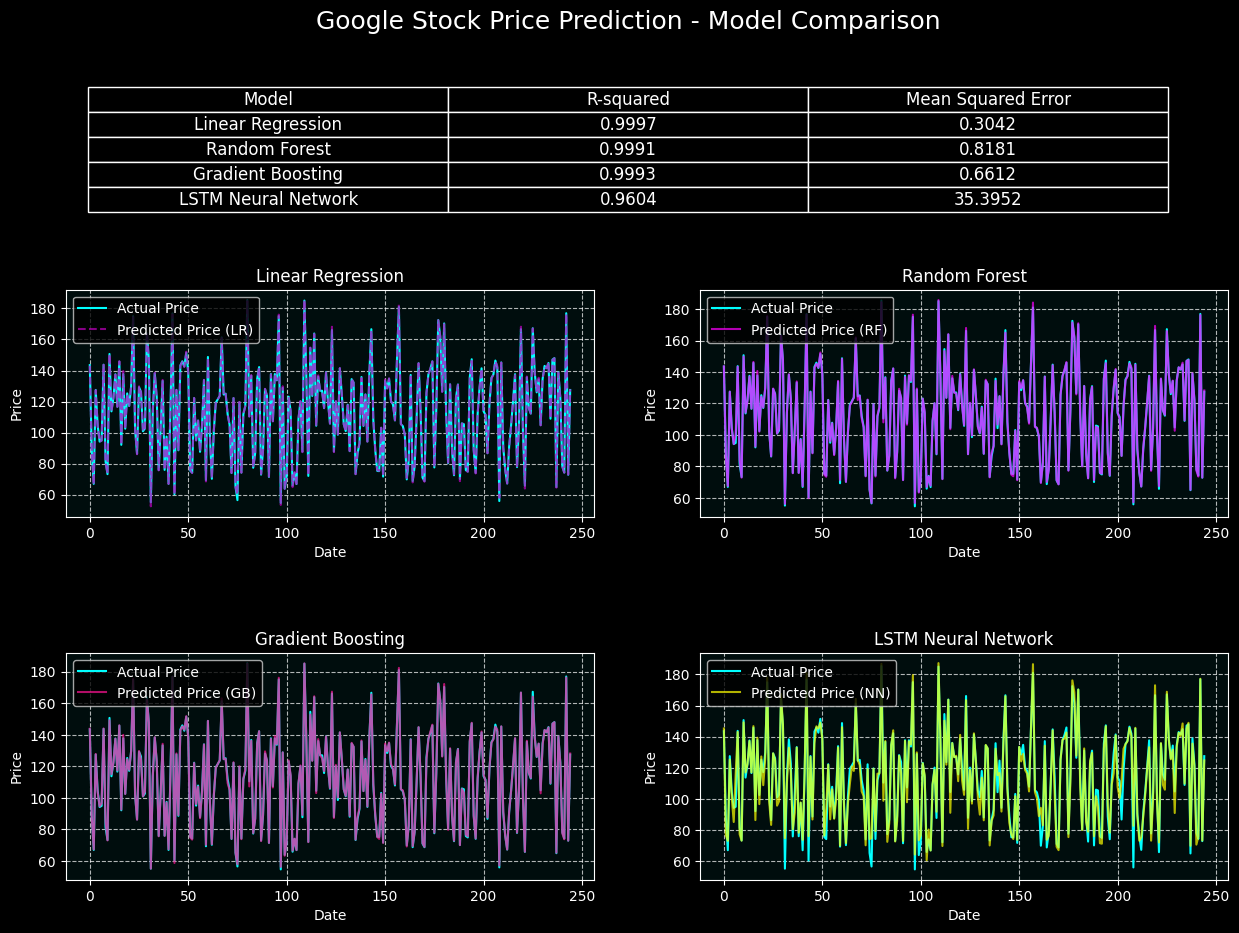

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors
cyberpunk_blue = '#00FFFF'
cyberpunk_pink = '#FF1493'  # This is the pink color for Gradient Boosting
cyberpunk_background = '#000D0D'
random_forest_color = '#FF00FF'  # Magenta for Random Forest
lstm_color = '#FFFF00'  # Yellow for LSTM

# Create subplots: 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.6, top=0.70)  # Adjusting space between the charts and shifting top margin for title

# Title for the entire figure
fig.suptitle('Google Stock Price Prediction - Model Comparison', fontsize=18, color='white')

# Table with model performance metrics
table_data = [
    ["Model", "R-squared", "Mean Squared Error"],
    ["Linear Regression", 0.9997, 0.3042],
    ["Random Forest", 0.9991, 0.8181],
    ["Gradient Boosting", 0.9993, 0.6612],
    ["LSTM Neural Network", 0.9604, 35.3952]
]

# Add the table without extra space
ax_table = fig.add_axes([0.1, 0.78, 0.8, 0.12])  # Shifting the table slightly lower
ax_table.axis('off')
table = ax_table.table(cellText=table_data, colWidths=[0.3]*3, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 1.5)

# Set table background to black and text to white
for key, cell in table.get_celld().items():
    cell.set_edgecolor('white')
    cell.set_text_props(color='white')
    cell.set_facecolor('black')

# Plot 1: Linear Regression
axs[0, 0].plot(np.arange(len(y_test_google[:250])), y_test_google[:250], color=cyberpunk_blue, label='Actual Price')
axs[0, 0].plot(np.arange(len(y_pred_google[:250])), y_pred_google[:250], 'm--', label='Predicted Price (LR)', alpha=0.7)
axs[0, 0].set_title('Linear Regression', fontsize=12, color='white')
axs[0, 0].set_xlabel('Date', fontsize=10, color='white')
axs[0, 0].set_ylabel('Price', fontsize=10, color='white')
axs[0, 0].legend(loc='upper left')
axs[0, 0].grid(True, linestyle='--', alpha=0.7)
axs[0, 0].set_facecolor(cyberpunk_background)

# Plot 2: Random Forest (Magenta)
axs[0, 1].plot(np.arange(len(y_test_google[:250])), y_test_google[:250], color=cyberpunk_blue, label='Actual Price')
axs[0, 1].plot(np.arange(len(y_pred_rf_google[:250])), y_pred_rf_google[:250], color=random_forest_color, label='Predicted Price (RF)', alpha=0.7)
axs[0, 1].set_title('Random Forest', fontsize=12, color='white')
axs[0, 1].set_xlabel('Date', fontsize=10, color='white')
axs[0, 1].set_ylabel('Price', fontsize=10, color='white')
axs[0, 1].legend(loc='upper left')
axs[0, 1].grid(True, linestyle='--', alpha=0.7)
axs[0, 1].set_facecolor(cyberpunk_background)

# Plot 3: Gradient Boosting (Pink)
axs[1, 0].plot(np.arange(len(y_test_google[:250])), y_test_google[:250], color=cyberpunk_blue, label='Actual Price')
axs[1, 0].plot(np.arange(len(y_pred_gb_google[:250])), y_pred_gb_google[:250], color=cyberpunk_pink, label='Predicted Price (GB)', alpha=0.7)  # Pink color
axs[1, 0].set_title('Gradient Boosting', fontsize=12, color='white')
axs[1, 0].set_xlabel('Date', fontsize=10, color='white')
axs[1, 0].set_ylabel('Price', fontsize=10, color='white')
axs[1, 0].legend(loc='upper left')
axs[1, 0].grid(True, linestyle='--', alpha=0.7)
axs[1, 0].set_facecolor(cyberpunk_background)

# Plot 4: LSTM Neural Network (Yellow)
axs[1, 1].plot(np.arange(len(y_test_google[:250])), y_test_google[:250], color=cyberpunk_blue, label='Actual Price')
axs[1, 1].plot(np.arange(len(y_pred_nn_google[:250])), y_pred_nn_google[:250], color=lstm_color, label='Predicted Price (NN)', alpha=0.7)
axs[1, 1].set_title('LSTM Neural Network', fontsize=12, color='white')
axs[1, 1].set_xlabel('Date', fontsize=10, color='white')
axs[1, 1].set_ylabel('Price', fontsize=10, color='white')
axs[1, 1].legend(loc='upper left')
axs[1, 1].grid(True, linestyle='--', alpha=0.7)
axs[1, 1].set_facecolor(cyberpunk_background)

# Display the final dashboard
plt.show()
